# Reproducible Data Analysis in Jupyter

*This notebook originally appeared as a [post](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/) on the blog [Pythonic Perambulations](http://jakevdp.github.io). See also the [Jupyter Workflow repository](http://github.com/jakevdp/JupyterWorkflow)*

<!-- PELICAN_BEGIN_SUMMARY -->

Jupyter notebooks provide a useful environment for interactive exploration of data. A common question I get, though, is how you can progress from this nonlinear, interactive, trial-and-error style of exploration to a more linear and reproducible analysis based on organized, packaged, and tested code. This series of videos presents a case study in how I personally approach reproducible data analysis within the Jupyter notebook.

Each video is approximately 5-8 minutes; the videos are
available in a [YouTube Playlist](https://www.youtube.com/playlist?list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ).
Alternatively, below you can find the videos with some description and links to relevant resources

<!-- PELICAN_END_SUMMARY -->

In [12]:
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

## Part 1: Loading and Visualizing Data

*In this video, I introduce the dataset, and use the Jupyter notebook to download and visualize it.*

In [13]:
# embed_video(1)

Relevant resources:

- [Fremont Bridge Bike Counter](http://www.seattle.gov/transportation/bikecounter_fremont.htm): the website where you can explore the data

- [A Whirlwind Tour of Python](https://github.com/jakevdp/WhirlwindTourOfPython): my book introducing the Python programming language, aimed at scientists and engineers.

- [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook): my book introducing Python's data science tools, including an introduction to the IPython, Pandas, and Matplotlib tools used here.

In [14]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [15]:
from urllib.request import urlretrieve

urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x25e9dd0b710>)

In [16]:
!head Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [17]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


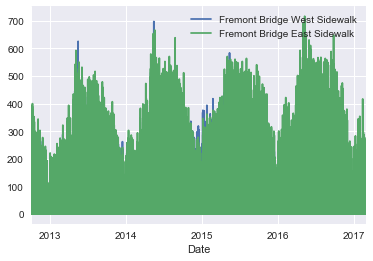

In [18]:
%matplotlib inline

data.plot();

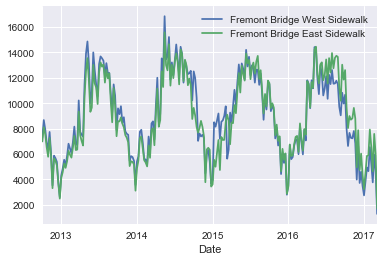

In [19]:
data.resample('W').sum().plot();

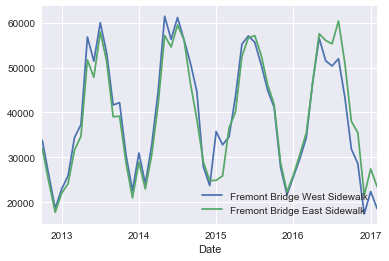

In [20]:
data.resample('M').sum().plot();

## Part 2: Further Data Exploration

*In this video, I do some slightly more sophisticated visualization with the data, using matplotlib and pandas.*

In [21]:
# embed_video(2)

Relevant Resources:

- [Pivot Tables Section](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.09-Pivot-Tables.ipynb) from the Python Data Science Handbook

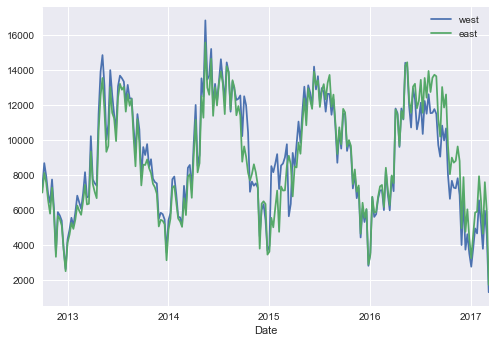

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['west', 'east']

data.resample('W').sum().plot();

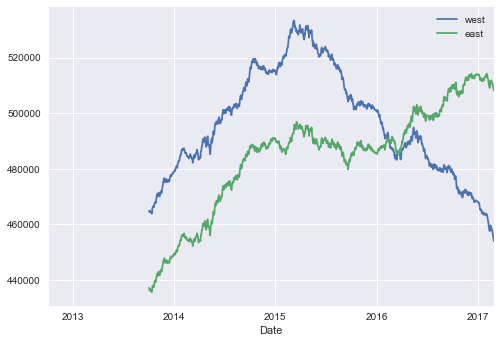

In [23]:
data.resample('D').sum().rolling(365).sum().plot();

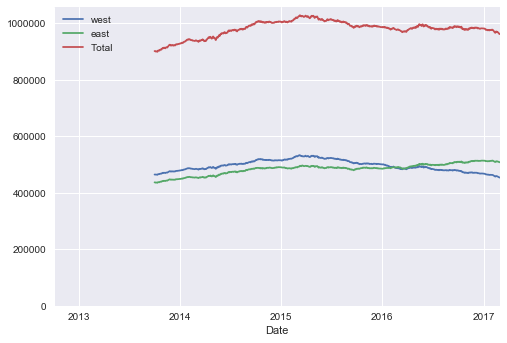

In [24]:
data['Total'] = data.sum(axis=1)

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

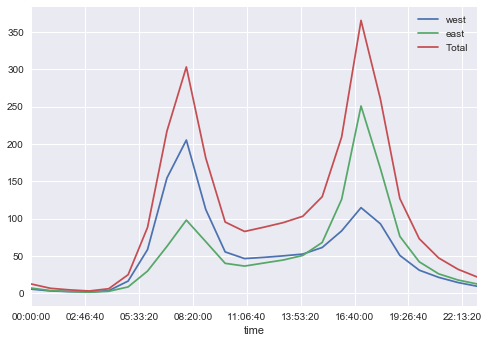

In [25]:
data.groupby(data.index.time).mean().plot();

In [28]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :3]

,2012-10-03,2012-10-04,2012-10-05
00:00:00,13.0,18.0,11.0
01:00:00,10.0,3.0,8.0
02:00:00,2.0,9.0,7.0
03:00:00,5.0,3.0,4.0
04:00:00,7.0,8.0,9.0


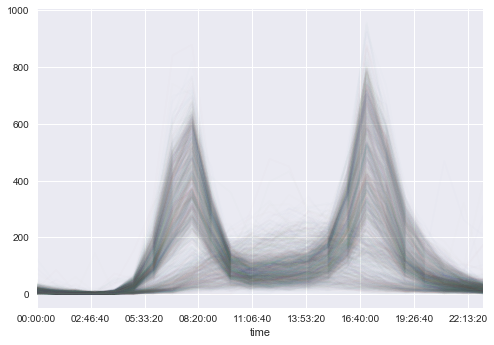

In [29]:
pivoted.plot(legend=False, alpha=0.01);

## Part 3: Version Control with Git & GitHub

*In this video, I set up a repository on GitHub and commit the notebook into version control.*

In [30]:
# embed_video(3)

Relevant Resources:

- [Version Control With Git](https://swcarpentry.github.io/git-novice/): excellent novice-level tutorial from Software Carpentry
- [Github Guides](https://guides.github.com/): set of tutorials on using GitHub
- [The Whys and Hows of Licensing Scientific Code](http://www.astrobetter.com/blog/2014/03/10/the-whys-and-hows-of-licensing-scientific-code/): my 2014 blog post on AstroBetter

## Part 4: Working with Data and GitHub

*In this video, I refactor the data download script so that it only downloads the data when needed*

In [31]:
# embed_video(4)

## Part 5: Creating a Python Package

*In this video, I move the data download utility into its own separate package*

In [6]:
# embed_video(5)

Relevant Resources:

- [How To Package Your Python Code](https://python-packaging.readthedocs.io/): broad tutorial on Python packaging.

## Part 6: Unit Testing with PyTest

*In this video, I add unit tests for the data download utility*

In [7]:
# embed_video(6)

Relevant resources:

- [Pytest Documentation](http://doc.pytest.org/)
- [Getting Started with Pytest](https://jacobian.org/writing/getting-started-with-pytest/): a nice tutorial by Jacob Kaplan-Moss

## Part 7: Refactoring for Speed

*In this video, I refactor the data download function to be a bit faster*

In [8]:
# embed_video(7)

Relevant Resources:

- [Python ``strftime`` reference](http://strftime.org/)
- [Pandas Datetime Section](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb) from the Python Data Science Handbook

## Part 8: Debugging a Broken Function

*In this video, I discover that my refactoring has caused a bug. I debug it and fix it.*

In [9]:
# embed_video(8)

## Part 8.5: Finding and Fixing a scikit-learn bug

*In this video, I discover a bug in the scikit-learn codebase, and go through the process of submitting a GitHub Pull Request fixing the bug*

In [10]:
embed_video(9)

## Part 9: Further Data Exploration: PCA and GMM

*In this video, I apply unsupervised learning techniques to the data to explore what we can learn from it*

In [11]:
embed_video(10)

Relevant Resources:

- [Principal Component Analysis In-Depth](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb) from the Python Data Science Handbook
- [Gaussian Mixture Models In-Depth](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb) from the Python Data Science Handbook

## Part 10: Cleaning-up the Notebook

*In this video, I clean-up the unsupervised learning analysis to make it more reproducible and presentable.*

In [12]:
embed_video(11)

Relevant Resources:

- [Learning Seattle's Work Habits from Bicycle Counts](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/): My 2015 blog post using Fremont Bridge data

<small>
*This post was composed within an IPython notebook; you can view a static version [here](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/JupyterWorkflow.ipynb) or download the full source [here](http://jakevdp.github.com/downloads/notebooks/JupyterWorkflow.ipynb).*
</small>